# lgo & gonum
This notebook demonstrates lgo works with [gonum](https://github.com/gonum), the most popular numerical computation packages in Go.

In [ ]:
import (
    "bytes"
    "fmt"
    "image/color"
    "math"
    "math/rand"
    
    "gonum.org/v1/gonum/mat"
    "gonum.org/v1/plot"
    "gonum.org/v1/plot/plotter"
    "gonum.org/v1/plot/plotutil"
    "gonum.org/v1/plot/vg"
    "gonum.org/v1/plot/vg/draw"
    "gonum.org/v1/plot/vg/vgimg"
)

# gonum/plot examples
https://github.com/gonum/plot/wiki/Example-plots

In [ ]:
func DisplayPlot(p *plot.Plot) {
    // Save the plot to a PNG file.
    var buf bytes.Buffer
    c, err := p.WriterTo(4*vg.Inch, 4*vg.Inch, "png")
    if err != nil {
        panic(err)
    }
    if _, err := c.WriteTo(&buf); err != nil {
        panic(err)
    }
    _ctx.Display.PNG(buf.Bytes(), nil)
}

## Plotutil
https://github.com/gonum/plot/wiki/Example-plots#plotutil

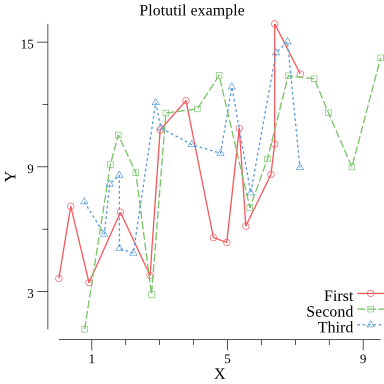

In [ ]:
{
    p, err := plot.New()
    if err != nil {
        panic(err)
    }
    
    p.Title.Text = "Plotutil example"
    p.X.Label.Text = "X"
    p.Y.Label.Text = "Y"

    err = plotutil.AddLinePoints(
        p,
        "First", randomPoints(15),
        "Second", randomPoints(15),
        "Third", randomPoints(15))
    if err != nil {
        panic(err)
    }

    DisplayPlot(p)
}

// randomPoints returns some random x, y points.
func randomPoints(n int) plotter.XYs {
    pts := make(plotter.XYs, n)
    for i := range pts {
        if i == 0 {
            pts[i].X = rand.Float64()
        } else {
            pts[i].X = pts[i-1].X + rand.Float64()
        }
        pts[i].Y = pts[i].X + 10*rand.Float64()
    }
    return pts
}

## More Detailed Style Settings
https://github.com/gonum/plot/wiki/Example-plots#more-detailed-style-settings

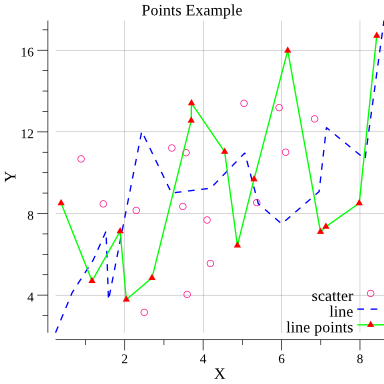

In [ ]:
{
    // Get some random points
    n := 15
    scatterData := randomPoints(n)
    lineData := randomPoints(n)
    linePointsData := randomPoints(n)

    // Create a new plot, set its title and
    // axis labels.
    p, err := plot.New()
    if err != nil {
        panic(err)
    }
    p.Title.Text = "Points Example"
    p.X.Label.Text = "X"
    p.Y.Label.Text = "Y"
    // Draw a grid behind the data
    p.Add(plotter.NewGrid())

    // Make a scatter plotter and set its style.
    s, err := plotter.NewScatter(scatterData)
    if err != nil {
        panic(err)
    }
    s.GlyphStyle.Color = color.RGBA{R: 255, B: 128, A: 255}

    // Make a line plotter and set its style.
    l, err := plotter.NewLine(lineData)
    if err != nil {
        panic(err)
    }
    l.LineStyle.Width = vg.Points(1)
    l.LineStyle.Dashes = []vg.Length{vg.Points(5), vg.Points(5)}
    l.LineStyle.Color = color.RGBA{B: 255, A: 255}

    // Make a line plotter with points and set its style.
    lpLine, lpPoints, err := plotter.NewLinePoints(linePointsData)
    if err != nil {
        panic(err)
    }
    lpLine.Color = color.RGBA{G: 255, A: 255}
    lpPoints.Shape = draw.PyramidGlyph{}
    lpPoints.Color = color.RGBA{R: 255, A: 255}

    // Add the plotters to the plot, with a legend
    // entry for each
    p.Add(s, l, lpLine, lpPoints)
    p.Legend.Add("scatter", s)
    p.Legend.Add("line", l)
    p.Legend.Add("line points", lpLine, lpPoints)

    DisplayPlot(p)
}

// randomPoints returns some random x, y points.
func randomPoints(n int) plotter.XYs {
    pts := make(plotter.XYs, n)
    for i := range pts {
        if i == 0 {
            pts[i].X = rand.Float64()
        } else {
            pts[i].X = pts[i-1].X + rand.Float64()
        }
        pts[i].Y = pts[i].X + 10*rand.Float64()
    }
    return pts
}

## Bar Charts
https://github.com/gonum/plot/wiki/Example-plots#bar-charts

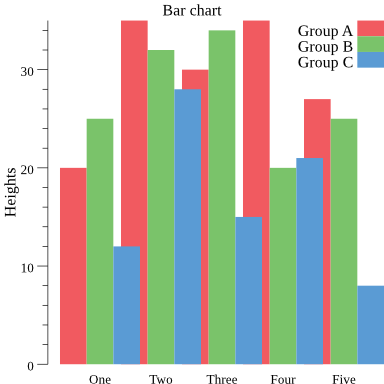

In [ ]:
{
	groupA := plotter.Values{20, 35, 30, 35, 27}
	groupB := plotter.Values{25, 32, 34, 20, 25}
	groupC := plotter.Values{12, 28, 15, 21, 8}

	p, err := plot.New()
	if err != nil {
		panic(err)
	}
	p.Title.Text = "Bar chart"
	p.Y.Label.Text = "Heights"

	w := vg.Points(20)

	barsA, err := plotter.NewBarChart(groupA, w)
	if err != nil {
		panic(err)
	}
	barsA.LineStyle.Width = vg.Length(0)
	barsA.Color = plotutil.Color(0)
	barsA.Offset = -w

	barsB, err := plotter.NewBarChart(groupB, w)
	if err != nil {
		panic(err)
	}
	barsB.LineStyle.Width = vg.Length(0)
	barsB.Color = plotutil.Color(1)

	barsC, err := plotter.NewBarChart(groupC, w)
	if err != nil {
		panic(err)
	}
	barsC.LineStyle.Width = vg.Length(0)
	barsC.Color = plotutil.Color(2)
	barsC.Offset = w

	p.Add(barsA, barsB, barsC)
	p.Legend.Add("Group A", barsA)
	p.Legend.Add("Group B", barsB)
	p.Legend.Add("Group C", barsC)
	p.Legend.Top = true
	p.NominalX("One", "Two", "Three", "Four", "Five")

    DisplayPlot(p)
}

## Functions
https://github.com/gonum/plot/wiki/Example-plots#functions

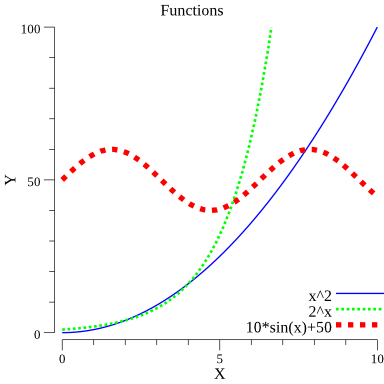

In [ ]:
{
	p, err := plot.New()
	if err != nil {
		panic(err)
	}
	p.Title.Text = "Functions"
	p.X.Label.Text = "X"
	p.Y.Label.Text = "Y"

	// A quadratic function x^2
	quad := plotter.NewFunction(func(x float64) float64 { return x * x })
	quad.Color = color.RGBA{B: 255, A: 255}

	// An exponential function 2^x
	exp := plotter.NewFunction(func(x float64) float64 { return math.Pow(2, x) })
	exp.Dashes = []vg.Length{vg.Points(2), vg.Points(2)}
	exp.Width = vg.Points(2)
	exp.Color = color.RGBA{G: 255, A: 255}

	// The sine function, shifted and scaled
	// to be nicely visible on the plot.
	sin := plotter.NewFunction(func(x float64) float64 { return 10*math.Sin(x) + 50 })
	sin.Dashes = []vg.Length{vg.Points(4), vg.Points(5)}
	sin.Width = vg.Points(4)
	sin.Color = color.RGBA{R: 255, A: 255}

	// Add the functions and their legend entries.
	p.Add(quad, exp, sin)
	p.Legend.Add("x^2", quad)
	p.Legend.Add("2^x", exp)
	p.Legend.Add("10*sin(x)+50", sin)
	p.Legend.ThumbnailWidth = vg.Inch*0.5

	// Set the axis ranges.  Unlike other data sets,
	// functions don't set the axis ranges automatically
	// since functions don't necessarily have a
	// finite range of x and y values.
	p.X.Min = 0
	p.X.Max = 10
	p.Y.Min = 0
	p.Y.Max = 100

    DisplayPlot(p)
}

# gonum/mat
https://godoc.org/gonum.org/v1/gonum/mat

In [ ]:
import (
    "fmt"
    
    "gonum.org/v1/gonum/mat"
)

In [ ]:
// https://godoc.org/gonum.org/v1/gonum/mat#example-Dense-Mul
{
    // Initialize two matrices, a and b.
    a := mat.NewDense(2, 2, []float64{
        4, 0,
        0, 4,
    })
    b := mat.NewDense(2, 3, []float64{
        4, 0, 0,
        0, 0, 4,
    })

    // Take the matrix product of a and b and place the result in c.
    var c mat.Dense
    c.Mul(a, b)

    // Print the result using the formatter.
    fc := mat.Formatted(&c, mat.Prefix("    "), mat.Squeeze())
    fmt.Printf("c = %v\n", fc)
}

c = ⎡16  0   0⎤
    ⎣ 0  0  16⎦


In [ ]:
// https://godoc.org/gonum.org/v1/gonum/mat#example-Dense-Inverse
{
    // Initialize two matrices, a and ia.
    a := mat.NewDense(2, 2, []float64{
        4, 0,
        0, 4,
    })
    var ia mat.Dense

    // Take the inverse of a and place the result in ia.
    ia.Inverse(a)

    // Print the result using the formatter.
    fa := mat.Formatted(&ia, mat.Prefix("     "), mat.Squeeze())
    fmt.Printf("ia = %.2g\n\n", fa)

    // Confirm that A * A^-1 = I
    var r mat.Dense
    r.Mul(a, &ia)
    fr := mat.Formatted(&r, mat.Prefix("    "), mat.Squeeze())
    fmt.Printf("r = %v\n\n", fr)

    // The Inverse operation, however, is numerically unstable,
    // and should typically be avoided.
    // For example, a common need is to find x = A^-1 * b.
    // In this case, the SolveVec method of VecDense
    // (if b is a Vector) or Solve method of Dense (if b is a
    // matrix) should used instead of computing the Inverse of A.
    b := mat.NewDense(2, 2, []float64{
        2, 0,
        0, 2,
    })
    var x mat.Dense
    x.Solve(a, b)

    // Print the result using the formatter.
    fx := mat.Formatted(&x, mat.Prefix("    "), mat.Squeeze())
    fmt.Printf("x = %v\n", fx)
}

ia = ⎡0.25    -0⎤
     ⎣   0  0.25⎦

r = ⎡1  0⎤
    ⎣0  1⎦

x = ⎡0.5    0⎤
    ⎣  0  0.5⎦


# gonum/stat
https://godoc.org/gonum.org/v1/gonum/stat

In [ ]:
import (
    "fmt"
    
    "gonum.org/v1/gonum/integrate"
    "gonum.org/v1/gonum/stat"
)

{
    y := []float64{0.1, 0.35, 0.4, 0.8}
    classes := []bool{true, false, true, false}
    
    tpr, fpr := stat.ROC(0, y, classes, nil)
    // compute Area Under Curve
    auc := integrate.Trapezoidal(fpr, tpr)
    fmt.Printf("true  positive rate: %v\n", tpr)
    fmt.Printf("false positive rate: %v\n", fpr)
    fmt.Printf("auc: %v\n", auc)
}

true  positive rate: [0 0.5 0.5 1 1]
false positive rate: [0 0 0.5 0.5 1]
auc: 0.75


# gonum/optimize
https://godoc.org/gonum.org/v1/gonum/optimize

In [ ]:
import (
    "fmt"
    "os"
    
    "gonum.org/v1/gonum/optimize"
    "gonum.org/v1/gonum/optimize/functions"
)

{
    p := optimize.Problem{
        Func: functions.ExtendedRosenbrock{}.Func,
        Grad: functions.ExtendedRosenbrock{}.Grad,
    }

    x := []float64{1.3, 0.7, 0.8, 1.9, 1.2}
    settings := optimize.DefaultSettings()
    settings.Recorder = nil
    settings.GradientThreshold = 1e-12
    settings.FunctionConverge = nil

    result, err := optimize.Local(p, x, settings, &optimize.BFGS{})
    if err != nil {
        fmt.Fprintln(os.Stderr, err)
        return
    }
    if err = result.Status.Err(); err != nil {
        fmt.Fprintln(os.Stderr, err)
    }
    fmt.Printf("result.Status: %v\n", result.Status)
    fmt.Printf("result.X: %v\n", result.X)
    fmt.Printf("result.F: %v\n", result.F)
    fmt.Printf("result.Stats.FuncEvaluations: %d\n", result.Stats.FuncEvaluations)
}

result.Status: GradientThreshold
result.X: [1 1 1 1 1]
result.F: 0
result.Stats.FuncEvaluations: 35
